In [252]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats
from scipy.stats import norm, t, f_oneway, f, kruskal, chi2, chisquare,pearsonr,chi2_contingency,shapiro,kstest,levene
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples

### 1.1 Definition of problem:

The Yulu project objectives are to apply scalable data analytics tool, techniques and Hypothesis testing to gain useful insights and to support decision making. Most project will source open data from the web. The activities include data extraction, preprocessing(missing value and outlier detection) using python numpy and pandas, data visualization using matplotlib and seaborn libraries and Hypothesis testing.

In this we are going to find significant variable in predicting the demand for shared electric cycles in the Indian market & how these variale describe the electric cycle demand.

Column Profiling:
1. datetime: datetime
2. season: season (1: spring, 2: summer, 3: fall, 4: winter)
3. holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
4. workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
5. weather:
   1: Clear, Few clouds, partly cloudy, partly cloudy
   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. temp: temperature in Celsius
7. atemp: feeling temperature in Celsius
8. humidity: humidity
9. windspeed: wind speed
10. casual: count of casual users
11. registered: count of registered users
12. count: count of total rental bikes including both casual and registered


### 1.2 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary:

In [197]:
df=pd.read_csv('bike_sharing.csv')

In [198]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [179]:
df.shape

(10886, 12)

In [180]:
df.ndim

2

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [13]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [14]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [15]:
df.describe(include='object').T

,count,unique,top,freq
datetime,10886,10886,2011-01-01 00:00:00,1


### 1.3 Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

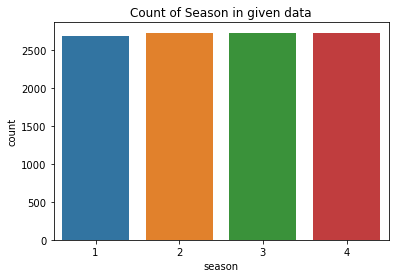

In [35]:
plt.title('Count of Season in given data')
sns.countplot(data=df, x='season')
plt.show()

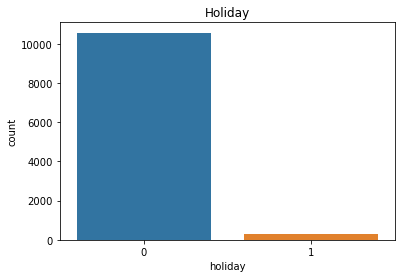

In [48]:
plt.title('Holiday')
sns.countplot(data=df, x='holiday')
plt.show()

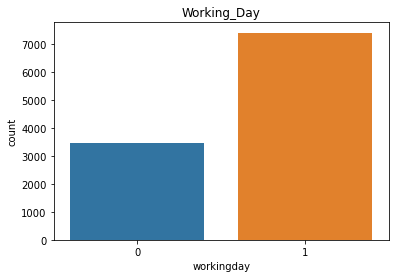

In [50]:
plt.title('Working_Day')
sns.countplot(data=df, x='workingday')
plt.show()

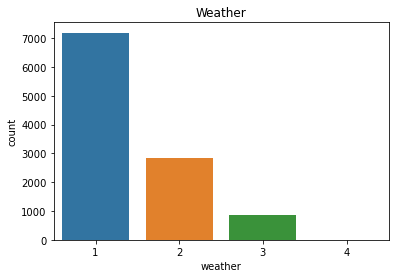

In [51]:
plt.title('Weather')
sns.countplot(data=df, x='weather')
plt.show()

C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


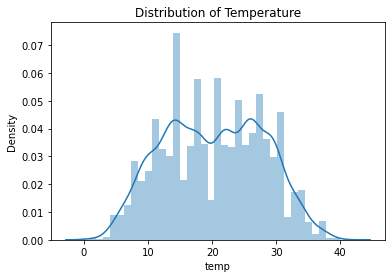

In [38]:
plt.title('Distribution of Temperature')
sns.distplot(df['temp'])
plt.show()

C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


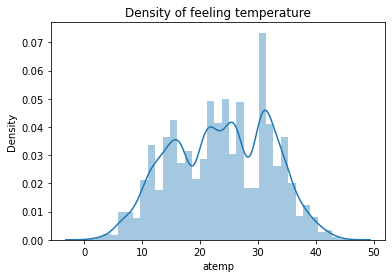

In [52]:
plt.title('Density of feeling temperature')
sns.distplot(df['atemp'])
plt.show()

C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


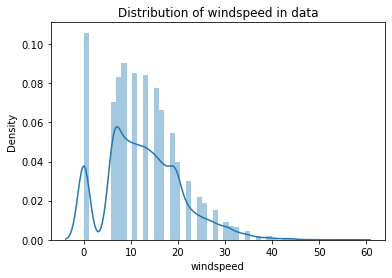

In [55]:
plt.title('Distribution of windspeed in data')
sns.distplot(df['windspeed'])
plt.show()

C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


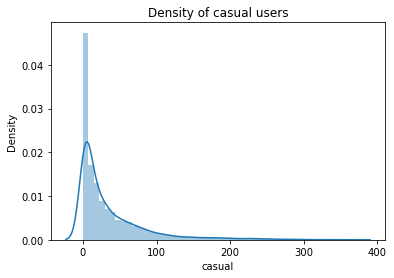

In [57]:
plt.title('Density of casual users')
sns.distplot(df['casual'])
plt.show()

C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


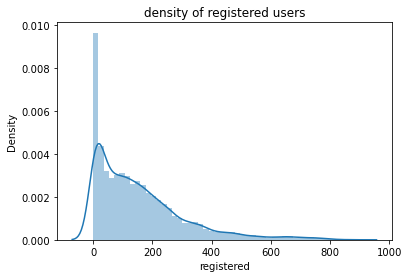

In [58]:
plt.title('density of registered users')
sns.distplot(df['registered'])
plt.show()

### 1.4 Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

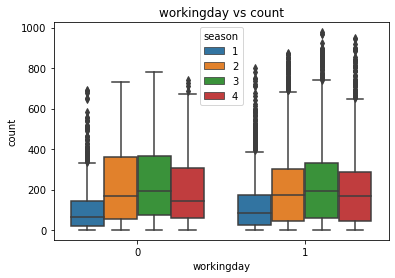

In [203]:
plt.title('workingday vs count')
sns.boxplot(data=df, x='workingday', y='count', hue='season')
plt.show()

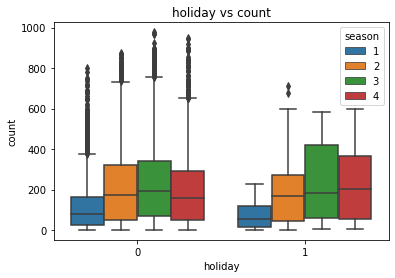

In [204]:
plt.title('holiday vs count')
sns.boxplot(data=df, x='holiday', y='count',hue='season')
plt.show()

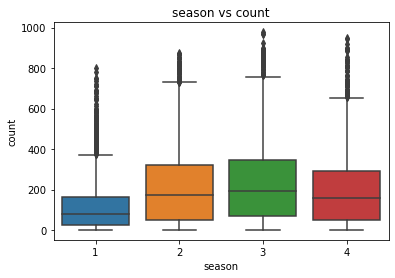

In [82]:
plt.title('season vs count')
sns.boxplot(data=df, x='season', y='count')
plt.show()

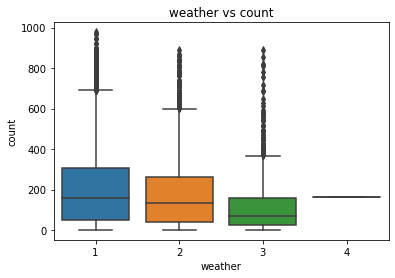

In [86]:
plt.title('weather vs count')
sns.boxplot(data=df, x='weather', y='count')
plt.show()

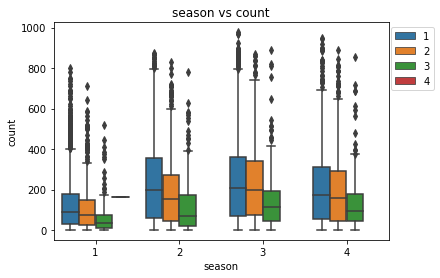

In [129]:
plt.title('season vs count')
sns.boxplot(data=df, x='season', y='count', hue='weather')
plt.legend(bbox_to_anchor =(1.15, 1.0),loc ="upper right")
plt.show()

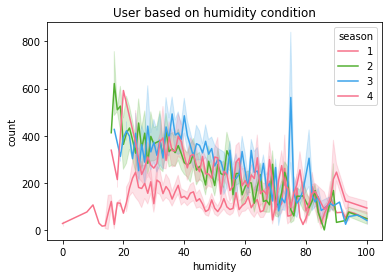

In [221]:
plt.title('User based on humidity condition')
sns.lineplot(data=df, x='humidity', y='count',hue='season',palette='husl')
plt.show()

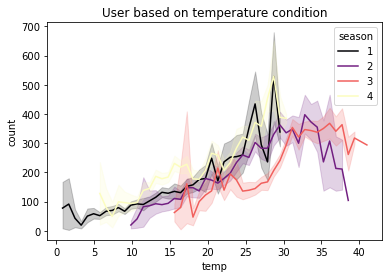

In [224]:
plt.title('User based on temperature condition')
sns.lineplot(data=df, x='temp', y='count',hue='season',palette='magma')
plt.show()

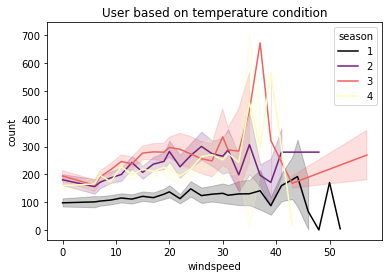

In [225]:
plt.title('User based on temperature condition')
sns.lineplot(data=df, x='windspeed', y='count',hue='season',palette='magma')
plt.show()

1    7412
0    3474
Name: workingday, dtype: int64

In [205]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
plt.title('workingday vs count')
sns.boxplot(data=df, x='workingday', y='count')
plt.show()

### 1.5 Insights based on EDA

#### Comments on range of attributes, outliers of various attributes:

1. datetime: It shows the date and time of data had been recorded, its range is 01-01-2011 to 31-12-2012.
2. season: This is a categorical variable, its range is between 1: spring, 2: summer, 3: fall, 4: winter.
3. holiday: Variable contains categorical data, 1 denotes holiday, 0 denotes no holiday.
4. workingday: Variable contains categorical data, 1 denotes workingday, 0 denotes holiday/weekend.
5. weather: This is a categorical variable, its range is between 1: Clear, Few clouds, partly cloudy, partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
6. temp: This variable temperature in Celsius, its range is between (0.82,41.00).
7. atemp: This variable shows feeling temperature in Celsius, min:0.760 & max:45.455.
8. humidity: This shows the amount of water vapor in the air. It ranges between 0 to 100.
9. windspeed: This field shows the wind speed, its range is 0 to 57 m/s.
10. casual: count of casual users, its range between 0 to 367.
11. registered: count of registered users, its ranges between 0 to 886.j
12. count: count of total rental bikes including both casual and registered, its ranges between 1 to 997.

Outliers: 
1. workingday vs count: has outlier is high where workingday is 1.
2. season vs count: has outlier is high where season is 1.
3. weather vs count: has higher outlier where weather is 3.

Refer the boxplot for the outliers.

#### Comments on the distribution of the variables and relationship between them

1. workingday vs count: Using them we can find how many users in workingday.
2. season vs count: Using them we can find how many users are using yulu in different seasons.
3. weather vs count: Using them we can find how many users are using yulu in different weather condition.

#### Comments for each univariate and bivariate plots

Univariate:
1. countplot(season): This shows count of different season condition.
2. countplot(holiday and workingday): This shows count of holiday/workingday is 0 and 1.
3. countplot(weather): This shows count of different weather condition.
4. distplot(temp, atemp, and windspeed): This shows the density of temp, atemp and windspeed in the given data.
Bivariate:
5. boxplot(workingday and count): This plot shows the distribution of quantitative data in a way that facilitates comparisons between workingday and count.
6. boxplot(season and count): This plot shows how season affect the total count of user.
7. boxplot(weather and count): This plot shows the distribution of quantitative data in a way that facilitates comparisons between weather and count.

### 2.	Hypothesis Testing 

#### 2.1 2-Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

H0: workingday has no effect on the number of electric cycles rented
Ha: workingday has effect on the number of electric cycles rented
Significance_level(alpha): 0.05

In [134]:
d1=df[df['workingday']==0]['count']
d2=df[df['workingday']==1]['count']
alpha = 0.05
t_stat, p_value = ttest_ind(d1,d2,alternative="greater")
print('t_stat:',t_stat, 'p_value:',p_value)
if p_value < alpha:
    print("p_value less than alpha and it successfully Reject H0")
    print("workingday has effect on the number of electric cycles rented")
else:
    print("p_value greater than alpha and it Fails to reject H0")
    print("workingday has no effect on the number of electric cycles rented")

t_stat: -1.2096277376026694 p_value: 0.8867759788681933
p_value greater than alpha and it Fails to reject H0
workingday has no effect on the number of electric cycles rented


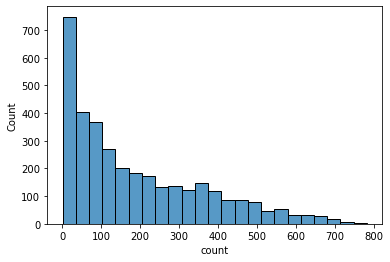

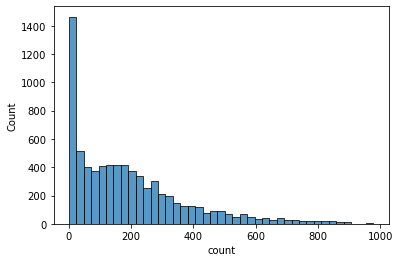

In [250]:
#Normality:
sns.histplot(d1)
plt.show()
sns.histplot(d2)
plt.show()

In [253]:
#Shapiro and Kolmogrov-Smirnoff test (KSTest)

# Shapiro
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(d1)
print(test_stat)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

0.8852126598358154
4.203895392974451e-45
Reject H0
Data is not Gaussian


In [255]:
d2_1=d2.sample(500)

test_stat, p_value = shapiro(d2)
print(test_stat)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

0.8702576160430908
0.0
Reject H0
Data is not Gaussian


In [256]:
# KSTest
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = kstest(
    d1, 
    norm.cdf, 
    args=(d1.mean(), d1.std())
)
print(test_stat)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

0.14021893781842565
4.7244927562341644e-60
Reject H0
Data is not Gaussian


In [257]:
# KSTest
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = kstest(
    d2_1, 
    norm.cdf, 
    args=(d2_1.mean(), d2_1.std())
)
print(test_stat)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

0.14791994446367163
5.163493571595409e-10
Reject H0
Data is not Gaussian


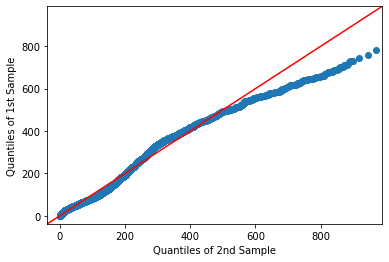

In [258]:
#QQplot
qqplot_2samples(d1, d2, line='45')
plt.show()

In [260]:
#variance# Levene test compares variance
# H0: both have same variance
test_stat, p_value = levene(d1, d2)
if p_value < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")


Fail to reject H0
Variances are the same


#### 2.2 ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

H0: No. of cycles rented is similar in different weather & season.
Ha: No. of cycles rented is different in different weather & season.
Significance_level(alpha): 0.05

In [135]:
wdf1=df[df['weather']==1]['count']
wdf2=df[df['weather']==2]['count']
wdf3=df[df['weather']==3]['count']
wdf4=df[df['weather']==4]['count']

sdf1=df[df['season']==1]['count']
sdf2=df[df['season']==2]['count']
sdf3=df[df['season']==3]['count']
sdf4=df[df['season']==4]['count']
alpha = 0.05
f_stat, p_value = f_oneway(wdf1,wdf2,wdf3,wdf4,sdf1,sdf2,sdf3,sdf4)
print('f_stat:',f_stat, 'p_value:',p_value)
if p_value < alpha:
    print("p_value less than alpha and it successfully Reject H0")
    print("No. of cycles rented is different in different weather & season.")
else:
    print("p_value greater than alpha and it Fails to reject H0")
    print("No. of cycles rented is similar in different weather & season.")

f_stat: 127.96661249562491 p_value: 2.8074771742434642e-185
p_value less than alpha and it successfully Reject H0
No. of cycles rented is different in different weather & season.


#### 2.3 Chi-square test to check if Weather is dependent on the season

H0: Weather independent on the season
Ha: weather dependent on the season.
Significance_level(alpha): 0.05

In [183]:
sea_wea_df=pd.crosstab(index=df['season'], columns=df['weather'])
sea_wea_df

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [192]:
chi_stat, p_value, df, expected=chi2_contingency(sea_wea_df)
print(f'chi_stat: {chi_stat}',f'p_value:{p_value}',f'df:{df}',f'Expected:{expected}',sep='\n')
if p_value < alpha:
    print("p_value less than alpha and it successfully Reject H0")
    print("weather dependent on the season.")
else:
    print("p_value greater than alpha and it Fails to reject H0")
    print("weather independent on the season.")

chi_stat: 49.158655596893624
p_value:1.549925073686492e-07
df:9
Expected:[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
p_value less than alpha and it successfully Reject H0
weather dependent on the season.


### Business Insights:

1. Bikes rented on holidays is high when compared to working days.
2. During summer and fall more bikes rented than other 2 seasons.
3. Bikes rented in Clear, Few clouds, partly cloudy, Mist during these weather condition is high.
4. when weather condition changes to rainy, snowfall, thunderstorm it drastically reduces.
5. whenever humidity is lesser than 20, less bikes were rented.
6. More bike rented, when windspeed is between 25 to 35. when windspeed is above 35 demand for bike rent reduces.
7. when the temperature crossed 35, less bikes were rented.

### Recommendations:

1. Increase bikes availability and bike hub for easy access during summer and fall season, because during these season   there is high demand for rental bikes.
2. Add some special protective features like rain shield and wiper for bikes to improve bikes rental in rainy, snowfall, thunderstorm weather conditions.
3. There is higher demand for bikes on holidays, so increase the availability of bikes at that time.
4. whenever windspeed above 35,humidity is lesser than 20 & temperature crossed 35 and lowered below 10 , reduce the availability of bikes during these conditions.
5. Give offers and improve promotion and infrastructure(bike hub, bikes) to increase bike rental during working days.